The following code finds and prints J at each time step. The next iteration will find the maximum over all time of each of the entries of J.

In [33]:
import numpy as np

class Counter(dict):
    largest_non_zero = 0
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0: 
            self[item] = new_val
            if (item != 0) and (new_val > self.largest_non_zero):
                self.largest_non_zero = new_val

def y(x):
    return 2**x


def jaccard_index(a, b):
    intersection = (a & b).bit_count()
    union = (a | b).bit_count()
    return intersection / union if union else 0

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    # n = np.random.poisson(lam = Tmax*(N+b*M))
    n = 4

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)

    ## initialize the transformation matrix X    
    X = [2**i for i in range(N)][::-1]
    ## initialize the Similarity matrix J
    J = np.eye(N)

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):
            ## recovery event: 
            i = np.random.randint(N)
            print(f"Recovery event of {i} which is {X[i]}")

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)

                ## update the similarity matrix
                for a in range(N):
                    if a == i:
                        J[a, a] = 1
                    else:
                        J[i, a] = J[a, i] = jaccard_index(X[i], X[a])
        
        ## infection event:
        else:

            i,j = E[np.random.randint(M)]
            print(f"spreading event between {i} which is {X[i]} and {j} which is {X[j]}")
            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new

                ## update the similarity matrix:
                for a in range(N):
                    J[a][i] = J[i][a] = J[a][j] = J[j][a]= jaccard_index(X[i], X[a]) ## X[i] = X[j] after spreading event
                J[i][j] = J[j][i] = 1 ## confirm diagonals are 1 
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        ## storing s1star for the largest non-zero count
        spatial = counts.largest_non_zero

        print(J)
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2 or extinction, depending)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R, spatial, J

In [36]:
N = 10
M = 3*N
Tmax = 10
b = 0.1
## random edge matrix
E = np.random.randint(0,N,size=2*M).reshape((N*3, 2))

In [37]:
times, R, spatial, J = find_tranformation_matrix(b, E, N, Tmax, 0)


Recovery event of 9 which is 1
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
spreading event between 1 which is 256 and 8 which is 2
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Recovery event of 1 which is 258
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 

Max[J] (over time!)

In [1]:
import numpy as np

class Counter(dict):
    largest_non_zero = 0
    def increment(self, item, delta = 1):
        new_val = delta + self.pop(item, 0)
        if new_val > 0: 
            self[item] = new_val
            if (item != 0) and (new_val > self.largest_non_zero):
                self.largest_non_zero = new_val

def y(x):
    return 2**x


def jaccard_index(a, b):
    intersection = (a & b).bit_count()
    union = (a | b).bit_count()
    return intersection / union if union else 0

def find_tranformation_matrix(b, E, N, Tmax, stopping_crit = 0):

    M = np.shape(E)[0]
    ## find the number of events that occur in the interval from T = 0 to T = Tmax
    n = np.random.poisson(lam = Tmax*(N+b*M))

    ## find times for all events
    times = np.sort(np.random.uniform(0, Tmax, n))
    R = np.zeros(n, dtype = int)

    ## initialize the transformation matrix X    
    X = [2**i for i in range(N)][::-1]
    ## initialize the Similarity matrix J
    J = np.eye(N)

    counts = Counter()
    for element in X:
        counts.increment(element, 1)

    # run simulation
    for t in range(n):
        
        if np.random.random() < N/(N + b*M):
            ## recovery event: 
            i = np.random.randint(N)
            # print(f"Recovery event of {i} which is {X[i]}")

            if X[i] != 0:
                
                counts.increment(X[i], -1)

                X[i] = 0

                counts.increment(0, 1)

                ## update the similarity matrix (find max over all time)
                for a in range(N):
                    new_val = jaccard_index(X[i], X[a])
                    if new_val > J[a, i]:
                        J[i, a] = J[a, i] = new_val
        
        ## infection event:
        else:

            i,j = E[np.random.randint(M)]
            # print(f"spreading event between {i} which is {X[i]} and {j} which is {X[j]}")
            if (X[i] != 0 or X[j] != 0) and X[i] != X[j]:
                    
                new = X[i] | X[j]
                counts.increment(X[i], -1)
                counts.increment(X[j], -1)
                counts.increment(new, 2)
                X[i] = X[j] = new

                ## update the similarity matrix:
                for a in range(N):
                    new_val = jaccard_index(X[i], X[a]) ## X[i] = X[j] after spreading event
                    if new_val > J[a, i]:
                        J[a, i] = J[i, a] = new_val
                    if new_val > J[a, j]:
                        J[a, j] = J[j, a] = new_val
                
        R[t] = non_zero_distinct_rows = len(counts) - (0 in counts)
        ## storing s1star for the largest non-zero count
        spatial = counts.largest_non_zero
        
        ## break the simulation because the pseudo mixing time has been found (the number of distinct rows and thus distinct columns is 2 or extinction, depending)

        if non_zero_distinct_rows == stopping_crit:
            times = times[:t+1]
            R = R[:t+1]
            break

    return times, R, spatial, J

In [70]:
times, R, spatial, J = find_tranformation_matrix(b, E, N, Tmax, 0)

In [71]:
print(J)

[[1.  0.  0.5 0.  0.  1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  1.  0.  0.  1.  1.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  1.  0.  0. ]
 [1.  0.  1.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  1. ]]


Now, we run this experiment on a line graph!

In [77]:
import networkx as nx

In [8]:
adj = np.eye(N)* 0
for i in range(1, N-1):
    adj[i, i-1] = adj[i, i+1] = 1

adj[0][1] = adj[0][N-1] = adj[N-1][0] = adj[N-1][N-2] = 1
print(adj)


[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]]


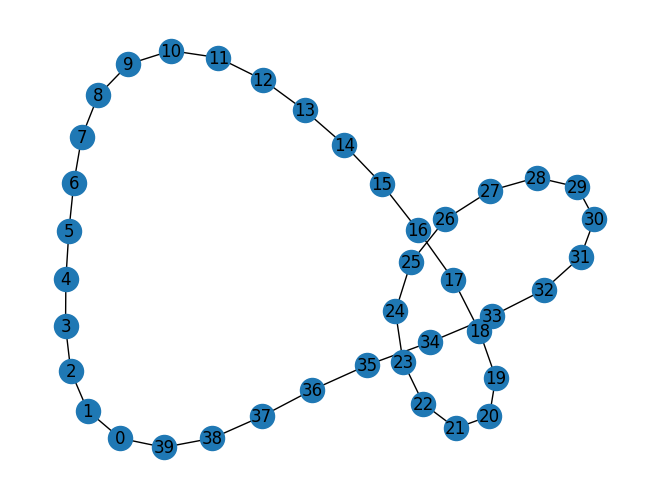

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adj)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

In [2]:
import networkx as nx
N = 40
adj = np.eye(N)* 0
for i in range(1, N-1):
    adj[i, i-1] = adj[i, i+1] = 1

adj[0][1] = adj[0][N-1] = adj[N-1][0] = adj[N-1][N-2] = 1
G = nx.from_numpy_array(adj)

E = list(G.edges)


In [100]:
times, R, spatial, J = find_tranformation_matrix(b, E, N, Tmax, 0)
print(J)

[[1.         1.         0.33333333 ... 0.         0.         0.        ]
 [1.         1.         1.         ... 0.         0.         0.        ]
 [0.33333333 1.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]
 [0.         0.         0.         ... 1.         1.         1.        ]]


In [9]:
Js = []
b = 0.3
Tmax = 100
for i in range(5):
    times, R, spatial, J = find_tranformation_matrix(b, E, N, Tmax, 0)
    Js.append(J)

print(Js)

[array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.

In [10]:
average = np.mean(Js, axis=0)

print(average)
print(np.shape(average))

[[1.         0.2        0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.2        1.         0.2        0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.2        1.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.  